## **1. Load our Model**

In [ ]:
# Import our load_model function 
import keras.api._v2.keras as keras
from keras.models import load_model

np.random.seed(1000)

# Import our model
model = load_model('/content/drive/MyDrive/Practice/CIFAR10_AlexNet_25_Epoch_v7.h5')

# Define the labels of CIFAR-10 datasest
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)      

In [ ]:
import cv2
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train = np.array([cv2.resize(img, (227, 227)) for img in x_train[:10000]])
# x_test = np.array([cv2.resize(img, (227, 227)) for img in x_test[:2000]])
# y_train = y_train[:10000]
# y_test = y_test[:2000]

170498071/170498071 [==============================] - 2s 0us/step


## **Get the symbolic outputs of each "key" layer**

In [ ]:
# Store the layers and the layers names
layers_dict = dict([(layer.name, layer) for layer in model.layers])
layers_dict

{'conv2d_10': <keras.layers.convolutional.conv2d.Conv2D at 0x7ff03b69d9d0>,
 'batch_normalization_16': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x7ff039157be0>,
 'activation_16': <keras.layers.core.activation.Activation at 0x7ff0370baac0>,
 'max_pooling2d_8': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7ff03708c6a0>,
 'dropout_14': <keras.layers.regularization.dropout.Dropout at 0x7ff0370bab20>,
 'conv2d_11': <keras.layers.convolutional.conv2d.Conv2D at 0x7ff0370153a0>,
 'batch_normalization_17': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x7ff037015490>,
 'activation_17': <keras.layers.core.activation.Activation at 0x7ff03702fd30>,
 'max_pooling2d_9': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7ff03702ff40>,
 'dropout_15': <keras.layers.regularization.dropout.Dropout at 0x7ff03703b100>,
 'zero_padding2d_6': <keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x7ff03703b6a0>,
 'conv2d_12': <keras.layers.co

In [ ]:
model_layers = []

# summarize filter shapes
for layer in model.layers:

  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  else:
    model_layers.append(layer)

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d_10 (11, 11, 3, 96)
conv2d_11 (5, 5, 96, 256)
conv2d_12 (3, 3, 256, 512)
conv2d_13 (3, 3, 512, 1024)
conv2d_14 (3, 3, 1024, 1024)


## **Let's take a look at the weights of our first Conv Layer**

In [ ]:
filters, bias = model_layers[0].get_weights()

In [ ]:
print("Filters Shape: ", filters.shape)
filters

Filters Shape:  (11, 11, 3, 96)


array([[[[ 2.43210583e-03,  1.64895747e-02, -1.28179388e-02, ...,
          -5.74127957e-03, -1.42631039e-03,  6.25760155e-03],
         [ 3.54155462e-04, -9.76416562e-03,  6.22848934e-03, ...,
          -1.34394430e-02,  2.01143287e-02, -6.63369521e-03],
         [ 5.77646424e-04,  1.34572806e-02,  1.77215005e-03, ...,
          -2.02248152e-03, -4.43781912e-03, -3.52252973e-03]],

        [[ 5.94025990e-03,  7.43701216e-03, -1.56129114e-02, ...,
           5.96978236e-03,  4.57309093e-03,  6.52932003e-03],
         [ 2.73830001e-03, -1.83576047e-02,  6.33522030e-03, ...,
           2.37421133e-03,  7.56566692e-03, -4.08216706e-03],
         [ 5.80638368e-03,  1.10458313e-02, -2.89904978e-03, ...,
          -2.75257532e-03, -1.51481722e-02,  5.43880276e-03]],

        [[ 6.96146674e-03,  3.71750025e-03,  2.80535984e-04, ...,
           1.38740707e-02,  6.06926065e-03,  1.33698136e-02],
         [ 5.69451973e-03, -1.70770083e-02,  1.86871272e-02, ...,
          -2.91185244e-03, -1.0105

In [ ]:
# And now let's look at our biases
print("Biases Shape: ", biases.shape)
biases

Biases Shape:  (1024,)


array([-3.1130814e-05,  1.9698412e-06,  4.0927184e-06, ...,
        1.0131454e-05, -2.2072416e-06, -3.6608237e-06], dtype=float32)

## **Let's normalize filter values to 0-1 so we can visualize them**

Our Filter weights range

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.17404280602931976 and Max =  0.14037910103797913
After Normalisation, Min = 0.0 and Max =  1.0


## **Visualize our Trained Fillters**

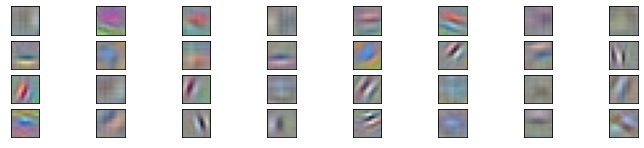

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    #print(f.shape)

    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.array(f))
    ix += 1
    
# show the figure
plt.show()

# **Filter Activations**

In [ ]:
from keras.models import Model

layers_output = []

# summarize filter shapes
for layer in model.layers:

  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  else:
    layers_output.append(layer.output)

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layers_output)

layers_output

[<KerasTensor: shape=(None, 32, 32, 96) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 16, 16, 256) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 10, 10, 512) dtype=float32 (created by layer 'conv2d_12')>,
 <KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv2d_13')>,
 <KerasTensor: shape=(None, 9, 9, 1024) dtype=float32 (created by layer 'conv2d_14')>]

(-0.5, 31.5, 31.5, -0.5)

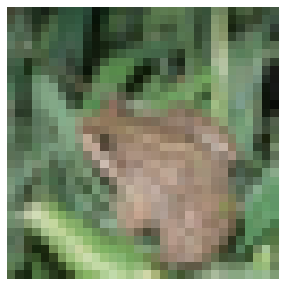

In [ ]:
import matplotlib.pyplot as plt

img_tensor = x_test[4]
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[:,:,:])
plt.axis('off')

## **Get the output after the 2nd Conv Filter (after ReLU)**

In [ ]:
img_tensor = img_tensor.reshape(1, 32, 32, 3)

# Returns a list of two Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 [==============================] - 1s 575ms/step
Number of layer activations: 5


#### **The activation of the first convolution layer for the image input**

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 96)


In [ ]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 16, 16, 256)


In [ ]:
fourth_layer_activation = activations[4]
print(fourth_layer_activation.shape)

(1, 9, 9, 1024)


In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)      

## **The output of the 4th Conv filter Feature Map in the first Conv layer**

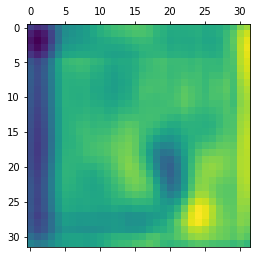

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
# plt.legend()

## **Create a function that displys the activations of specific layers**

In [ ]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5*4))
    for row in range(0,row_size):
        for col in range(0,col_size):
            img = activation[0, :, :, activation_index]
            img = cv2.resize(img, (224,224))
            ax[row][col].imshow(img)
            # ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1


#### **The output of the first Conv layer**

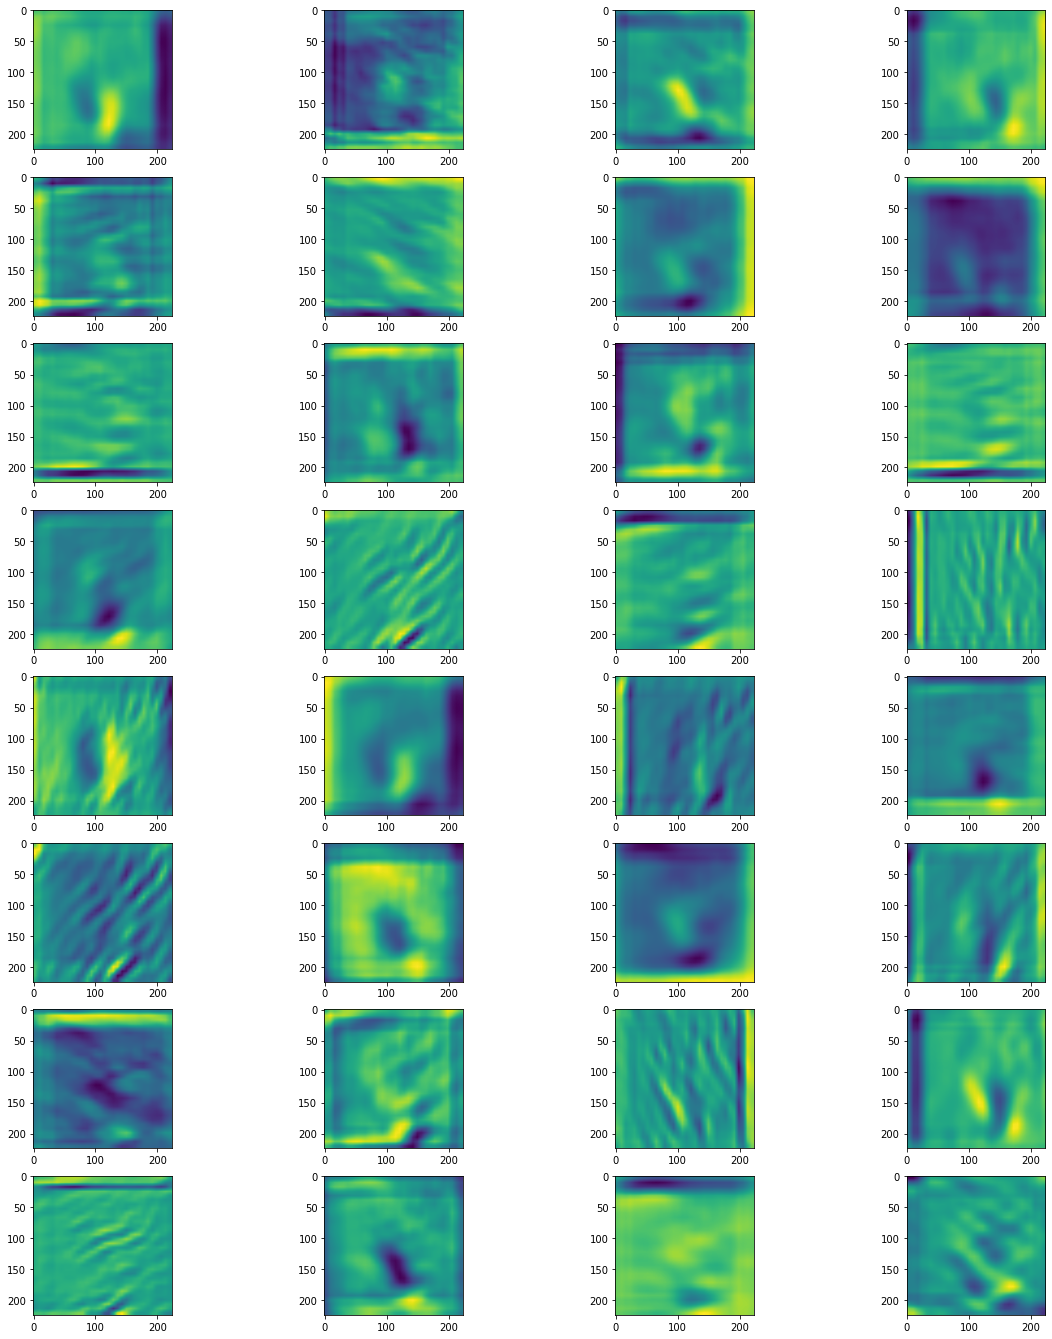

In [ ]:
display_activation(activations, 4, 8, 0)

## **The output of the fourth Conv layer**

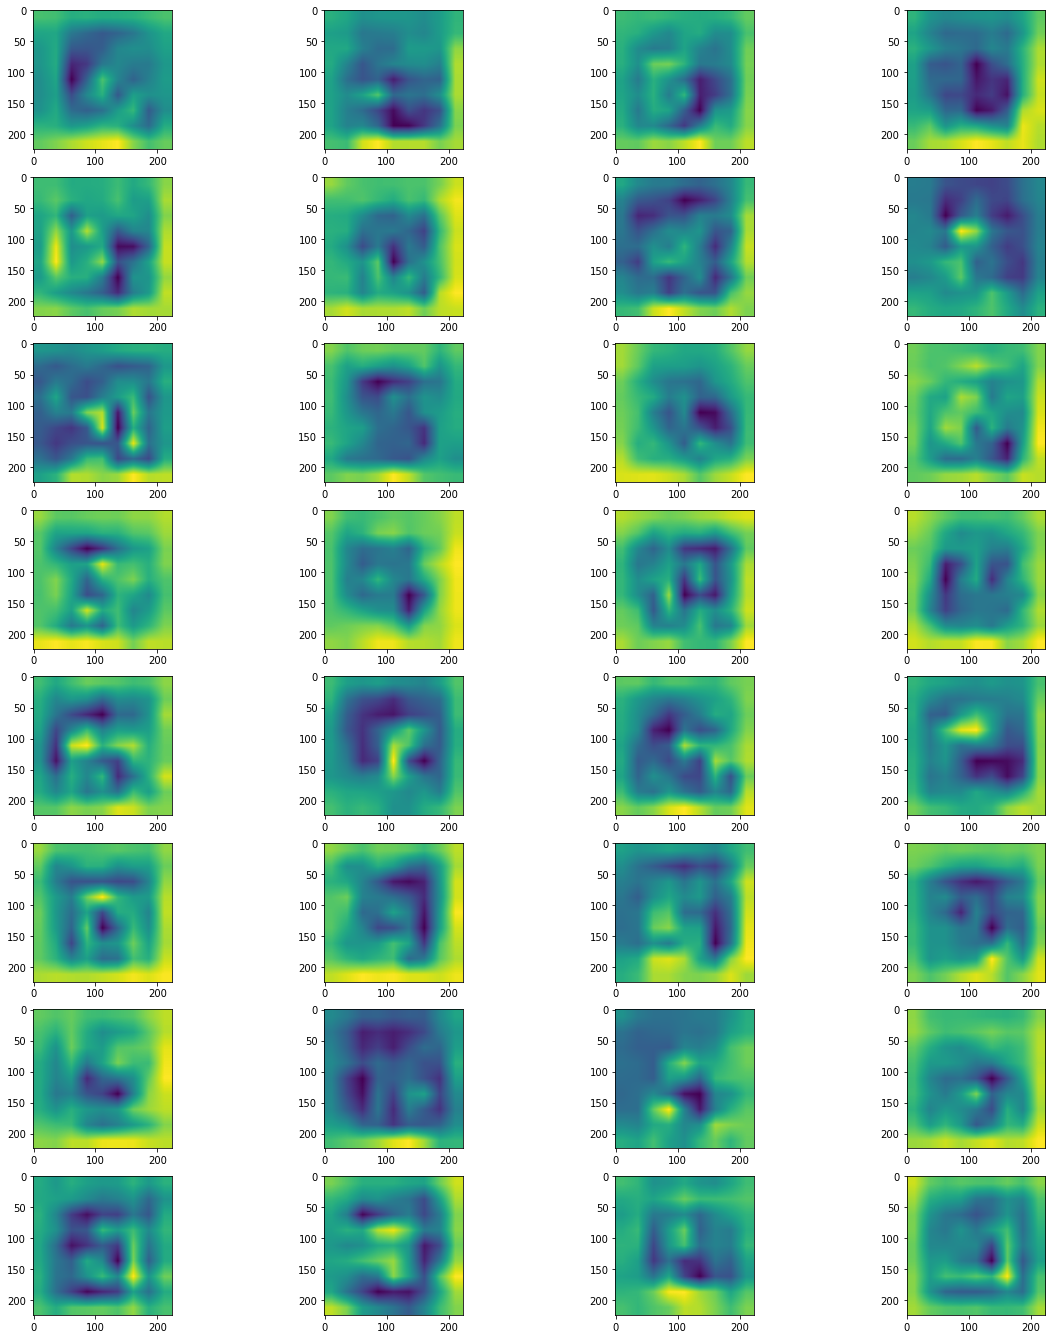

In [ ]:
display_activation(activations, 4, 8, 4)